Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Gasper Bizjan"

---

## 10 Quadrature Rules on the Reference Triangle

In this assignment we will implement the Quadrature Rule on the Reference Triangle $\hat T$ to solving numerical integrals. 
Consider the typical reference configuration $\hat{T}$ - the triangle with vertices $(0,0)$, $(1,0)$ and $(0,1)$.<br>
The following rules are capable of integrating linear or quadratic polynomials exactly:
<ol>
<li> Linear: 
$$w_0 = \dfrac{1}{2}$$
$$ (\hat{x}_0,\hat{y}_0) = \left(\dfrac{1}{3},\dfrac{1}{3}\right)$$ </li>
<li> Quadratic: 
$$w_0 = w_1 = w_2  = \dfrac{1}{6}\ $$
$$ (\hat{x}_0,\hat{y}_0) = \left(\dfrac{1}{6},\dfrac{1}{6}\right)$$
$$ (\hat{x}_1,\hat{y}_1) = \left(\dfrac{2}{3},\dfrac{1}{6}\right)$$
$$ (\hat{x}_2,\hat{y}_2) = \left(\dfrac{1}{6},\dfrac{2}{3}\right)$$
</li>
    
    
We will approximate the Integral on the reference Triangle over a function $f\colon \hat{T}\longrightarrow R$ by an discrete Integral 
$$ 
I_h(f) = \sum \limits_{i=0}^{N_{qp}} f(\hat{x}_i,\hat{y}_i) w_i \approx \int_{\hat{T}} f(\hat{x},\hat{y}) d(\hat{x},\hat{y})
$$

    
    

### 10.1 - Quadrature class
Implement a class ```QuadratureRule``` that represents the quadrature points and the corresponding weights of a certain order of exacness. 

#### 10.1.1 - Contructor 
The constructor should initializes the members ```self.points``` and ```self.weights``` as numpy array with shape $N_{qp} \times 2$ or $N_{qp}$, respectivily. The number of quadrature points $N_{qp}$ depends on the given order. The constructor should choise the first rule in case of linear and the secound rule in case of quadratic order. In case of  higher order choise the second rule  and print a warning. <br>
<b>INPUT:</b> ```order```, Integer, polynomial order, which we want to integrate exactly by the quadrature rule.  

#### 10.1.2 - getter function 
Write a function ```getPointsAndWeights``` which return the points and weights. <br>
<b>OUTPUT:</b> tuple (points, weights)

In [2]:
import numpy as np

class QuadratureRule:
    def __init__(self, order):
        if order == 1:
            self.points = np.array([[1/3, 1/3]])
            self.weights = np.array([1/2])
        elif order == 2:
            self.points = np.array([[1/6, 1/6], [2/3, 1/6], [1/6, 2/3]])
            self.weights = np.array([1/6, 1/6, 1/6])
        elif order > 2:
            print( f"Error in order = {order} > 2. Choosing Quadratic order")
            self.points = np.array([[1/6, 1/6], [2/3, 1/6], [1/6, 2/3]])
            self.weights = np.array([1/6, 1/6, 1/6])
        else:
            print(f"Error in order input. Terminating")

    def getPointsAndWeights(self):
        return self.points, self.weights
    
qr = QuadratureRule(2)
qr.getPointsAndWeights()

(array([[0.16666667, 0.16666667],
        [0.66666667, 0.16666667],
        [0.16666667, 0.66666667]]),
 array([0.16666667, 0.16666667, 0.16666667]))

### 10.2 - Numerical Integration

Let assume $\Omega = \mathbb{R}^2$ and $f(x,y) = e^{-(x^2+y^2)}$. We will compute the integral on $\Omega$
$$
I(f) = \int_{\mathbb{R}^2} f(x,y) d(x,y) = \pi
$$
numerically by using a grid a quadrature rule.  

#### 10.2.1 - reference value (optional)
Compute the $I$ by pen and paper. 

$$
I(f) = \int_{\mathbb{R}^2} f(x,y) d(x,y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} e^{-(x^2+y^2)} \text{d}x \text{d}y
$$

We transform the integral $I(f(x,y))$ into polar coordinates $I(f(r,\phi))$.
$$
I(f)=\int_{0}^{\infty}\int_{0}^{2 \pi} e^{-r^2} r \text{ d}\phi \text{d}r = 2\pi \int_{0}^{\infty} e^{-r^2} r \text{ d}r
$$

Using a substitution $u=-r^2$ we get the integral
$$
I(f)=-\pi \int_{0}^{-\infty} e^u \text{d}u= -\pi \left[ e^u \right]_0^{-\infty} = -\pi \left[\lim_{x \to -\infty} e^u - e^0 \right]=-\pi \left[ 0 - 1 \right]=\pi 
$$

#### 10.2.2 - numerical value
Compute a approximation ```Ih``` given by 
$$
I_h(f) = \sum \limits_{T \in \tau_h} \sum \limits_{i=0}^{N_{qp}}  w_i f(F_T(\hat{x}_i,\hat{y}_i)) \vert\operatorname{det}DF_T\vert  \approx \int_{\mathbb{R}^2} f(x,y) d(x,y)
$$ 
numerically. We can't discretize the whole domain ${\mathbb{R}^2}$ by a grid. Choose grid $\tau_h$ such that the discrete domain and the number of grid points are a compromise between afford and less approximation error. 

<b> Requirements: </b> Store your result in a variable ```Ih```.<br>
Use not more the $500$ degrees of freedom (DOFs) to reach an approximation error of $\vert I_h -\pi\vert < 10^{-5}$. 


<b>Hint:</b> the grid class is updated with the functionality from assignment 9. Use the quadrature rule from corresponding class above. If you haven't done this task, you write down the quadrature rule manually. 

DoF (two DoF per point) used: Nr. points = 484 
Reached approximation error abs(pi-Ih)=9.532212248863914e-06


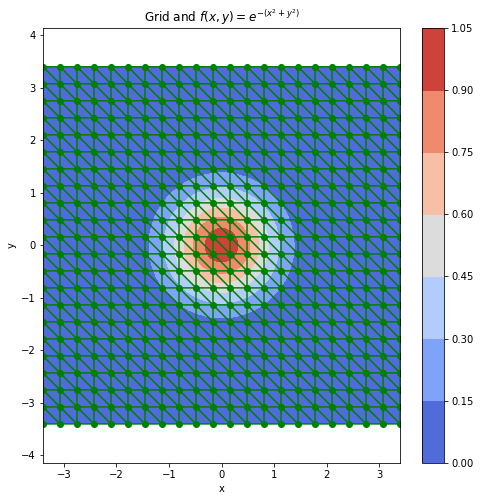

<Figure size 576x576 with 0 Axes>

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import grid
plt.rcParams["figure.figsize"] = [8, 8]

# parameters: a - size in one direction, h - step size
a = 3.4
h = 22

# defining grid, quadrature rule
tauh = grid.Grid(-a, a, -a, a, h, h)
qr = QuadratureRule(2)
points, weights = qr.getPointsAndWeights()

# define function
f = lambda x: np.exp(-np.sum(x**2, axis=2))

# Numerical integration
Ih = np.sum(tauh.adet @ f(tauh.evalReferenceMap(points)) @ weights)

# Ploting the grid and function
x = np.linspace(-a, a)
X, Y = np.meshgrid(x, x)
Z = np.exp(-((X**2) + Y ** 2))
contour = plt.contourf(X, Y, Z, cmap=plt.cm.coolwarm)
plt.axis("equal")
plt.scatter(tauh.points[:, 0], tauh.points[:, 1], color='g')
plt.triplot(tauh.points[:, 0], tauh.points[:, 1], tauh.cells, color='g')
plt.colorbar(contour)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Grid and $f(x,y)=e^{-(x^2+y^2)}$")
fig = plt.figure()

# Comparing numerical and analytical results
print(f"DoF (two DoF per point) used: Nr. points = {len(tauh.points)} ")
print(f"Reached approximation error abs(pi-Ih)={abs(Ih-np.pi)}")